Code written by: Billy Atkinson (watkinson@umces.edu) \
Paper Citation: Mason, E., A. Pascual, and J. C. McWilliams, 2014: A new sea surface height–based code for oceanic mesoscale eddy tracking. J. Atmos. Oceanic Technol., 31, 1181–1188, doi:10.1175/JTECH-D-14-00019.1. \
Source Code: __[Pixels inside/outside Eddies Documentation](https://py-eddy-tracker.readthedocs.io/en/latest/python_module/06_grid_manipulation/pet_hide_pixel_out_eddies.html#sphx-glr-python-module-06-grid-manipulation-pet-hide-pixel-out-eddies-py)__ \
Date of last revision: 08/10/2022 

In [2]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import datetime as dt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from scipy.stats import linregress
import numpy.ma as ma
import glob
import os
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.observations.observation import EddiesObservations

In [73]:
anti_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/Anticyclonic/Anticyclonic_*.nc'))
#cycl_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/Cyclonic/Cyclonic_*.nc'))
anti_files=anti_files[:1454]
#cycl_files=cycl_files[:1454]
num_files = len(anti_files)#number of Cyclonic eddy files for the loop
#num_files = len(cycl_files)
#print(files)
#print(num_files)

ds = xr.open_dataset(anti_files[0])#load in the first Cyclonic eddy file from the directory (02/08/1999)
#ds = xr.open_dataset(cycl_files[0])
df = ds.to_dataframe()#convert xarray Dataset to panda dataframe
#print(df)

n  = 1
while n < num_files:
    # Load a single dataset
    xs = xr.open_dataset(anti_files[n])
    df2 = xs.to_dataframe()
    
    # Add the dataset to the list
    df = df.append(df2)
    n=n+1
'''    
n  = 1
while n < num_files:
    # Load a single dataset
    xs = xr.open_dataset(cycl_files[n])
    df2 = xs.to_dataframe()
    
    # Add the dataset to the list
    df = df.append(df2)
    n=n+1
'''

/tmp/ipykernel_151170/3461678664.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_151170/3461678664.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_151170/3461678664.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_151170/3461678664.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_151170/3461678664.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
/tmp/ipykernel_151170/346

'    \nn  = 1\nwhile n < num_files:\n    # Load a single dataset\n    xs = xr.open_dataset(cycl_files[n])\n    df2 = xs.to_dataframe()\n    \n    # Add the dataset to the list\n    df = df.append(df2)\n    n=n+1\n'

In [74]:
dir = '/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/'
df.to_pickle(dir + 'Anticyclonic_eddies_2003_to_2006.pkl')
#cycl_eddies = pd.read_pickle(dir + "Cyclonic_eddies_2003_to_2006.pkl")
#pd.set_option('display.max_columns',30)
#cycl_eddies.head()

In [9]:
#df.head()

dir = '/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/'

#df.to_pickle(dir + 'Cyclonic_eddies_2003_to_2006.pkl')
cycl_eddies = pd.read_pickle(dir + "Cyclonic_eddies_2003_to_2006.pkl")
#print(cycl_eddies[0:2,:])
#cycl_eddies = cycl_eddies.iloc[6::50,:]
#print(cycl_eddies)

cycl_eddies = cycl_eddies.iloc[:,[0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,20,21,22,]]
cycl_eddies = cycl_eddies.iloc[6::50,:]
#print(np.shape(cycl_eddies))

cycl_eddies = cycl_eddies.reset_index(drop=True)#drop previous method of indexing and reset
cycl_eddies['time']=pd.to_datetime(cycl_eddies['time'])#convert entire "Dates" Column to datetime format this time 
cycl_eddies.index=cycl_eddies['time']#replace index with entire "Dates" Column to work with groupby function
#cycl_eddies = cycl_eddies.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
#print(cycl_eddies)
#cycl_eddies = cycl_eddies.iloc[:,[0,1,2,4]]#,5,6]]#simplify dataframe to just time index and amplitude
#cycl_eddies = cycl_eddies["2004-01-01":"2004-12-31"]
cycl_eddies['NPP_mean_entire_eddy']=cycl_chlor_mean
#cycl_eddies['cycl_chlor_min']=cycl_chlor_min
#cycl_eddies.replace([np.inf,-np.inf,-1.000000e+40,1.000000e+40,0],np.nan,inplace=True)
#cycl_eddies.dropna(inplace=True)
cycl_eddies = cycl_eddies.to_xarray()
cycl_eddies.to_netcdf(dir + 'GoM_Cyclonic_Eddies_2003_to_2006.nc')
print(cycl_eddies)
'''

import pandas as pd
anti_eddies = pd.read_pickle(dir + "Anticyclonic_eddies_2003_to_2006.pkl")
#anti_eddies = pd.read_pickle(dir + "Anticyclonic_eddies_2004.pkl")
#anti_eddies = anti_eddies.droplevel(0)
anti_eddies = anti_eddies.iloc[:,[0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,20,21,22,]]
anti_eddies = anti_eddies.iloc[6::50,:]

anti_eddies = anti_eddies.reset_index(drop=True)#drop previous method of indexing and reset
anti_eddies['time']=pd.to_datetime(anti_eddies['time'])#convert entire "Dates" Column to datetime format this time 
anti_eddies.index=anti_eddies['time']
#anti_eddies = anti_eddies.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]#replace index with entire "Dates" Column to work with groupby function
#anti_eddies = anti_eddies.iloc[:,[0]]#simplify dataframe to just time index and amplitude
#anti_eddies = anti_eddies["2004-01-01":"2004-12-31"]
#anti_eddies = anti_eddies.iloc[:,[0,1,2,4]]#,5,6]]
anti_eddies['NPP_mean_entire_eddy']=anti_chlor_mean
#anti_eddies['anti_chlor_min']=anti_chlor_min
#anti_eddies.replace([np.inf,-np.inf,-1.000000e+40,1.000000e+40,0],np.nan,inplace=True)
#anti_eddies.dropna(inplace=True)
anti_eddies = anti_eddies.to_xarray()
anti_eddies.to_netcdf(dir + 'GoM_Anticyclonic_Eddies_2003_to_2006.nc')
print(anti_eddies)
'''

<xarray.Dataset>
Dimensions:                        (time: 11220)
Coordinates:
  * time                           (time) datetime64[ns] 2003-01-01 ... 2006-...
Data variables: (12/19)
    amplitude                      (time) float32 0.0628 0.0352 ... 0.0687
    effective_area                 (time) float32 1.222e+10 ... 6.259e+09
    effective_contour_height       (time) float32 -0.01 -0.045 ... -0.19 -0.285
    effective_contour_shape_error  (time) float32 17.0 43.0 22.0 ... 47.5 48.5
    effective_radius               (time) float32 6.31e+04 ... 4.965e+04
    inner_contour_height           (time) float32 -0.07 -0.08 ... -0.22 -0.35
    ...                             ...
    speed_area                     (time) float32 1.222e+10 ... 6.259e+09
    speed_average                  (time) float32 0.3493 0.1682 ... 0.3971
    speed_contour_height           (time) float32 -0.01 -0.045 ... -0.195 -0.285
    speed_contour_shape_error      (time) float32 17.0 43.0 42.5 ... 47.0 48.5
    spee

'\n\nimport pandas as pd\nanti_eddies = pd.read_pickle(dir + "Anticyclonic_eddies_2003_to_2006.pkl")\n#anti_eddies = pd.read_pickle(dir + "Anticyclonic_eddies_2004.pkl")\n#anti_eddies = anti_eddies.droplevel(0)\nanti_eddies = anti_eddies.iloc[:,[0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,20,21,22,]]\nanti_eddies = anti_eddies.iloc[6::50,:]\n\nanti_eddies = anti_eddies.reset_index(drop=True)#drop previous method of indexing and reset\nanti_eddies[\'time\']=pd.to_datetime(anti_eddies[\'time\'])#convert entire "Dates" Column to datetime format this time \nanti_eddies.index=anti_eddies[\'time\']\n#anti_eddies = anti_eddies.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]#replace index with entire "Dates" Column to work with groupby function\n#anti_eddies = anti_eddies.iloc[:,[0]]#simplify dataframe to just time index and amplitude\n#anti_eddies = anti_eddies["2004-01-01":"2004-12-31"]\n#anti_eddies = anti_eddies.iloc[:,[0,1,2,4]]#,5,6]]\nanti_eddies[\'NPP_mean_entire_eddy\']=anti_chlor_m

In [21]:
import xarray as xr
import pandas as pd
dir = '/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/'
df_cycl = xr.open_dataset(dir + 'GoM_Cyclonic_Eddies_2003_to_2006.nc')
df_anti = xr.open_dataset(dir + 'GoM_Anticyclonic_Eddies_2003_to_2006.nc')


df_cycl = df_cycl.dropna(dim='time',how='any')
#anti_eddies
chl = df_cycl.variables['NPP_mean_entire_eddy']
#log_chl = np.log(chl)
eff_area = df_cycl.variables['effective_area']
eff_radius = df_cycl.variables['effective_radius']
speed = df_cycl.variables['speed_average']
#log_speed = np.log(speed)
amp = df_cycl.variables['amplitude']

df_anti = df_anti.dropna(dim='time',how='any')
chl_anti = df_anti.variables['NPP_mean_entire_eddy']
#log_chl_anti = np.log(chl_anti)
eff_area_anti = df_anti.variables['effective_area']
eff_radius_anti = df_anti.variables['effective_radius']
speed_anti = df_anti.variables['speed_average']
#log_speed_anti = np.log(speed_anti)
amp_anti = df_anti.variables['amplitude']
'''
#eff_area
plt.plot(chl)
plt.title('Chl in individual eddies')
plt.xlabel('eddies')
plt.ylabel('Chl')
plt.xlim(None)
#plt.ylim(0,2)
plt.show()
'''

"\n#eff_area\nplt.plot(chl)\nplt.title('Chl in individual eddies')\nplt.xlabel('eddies')\nplt.ylabel('Chl')\nplt.xlim(None)\n#plt.ylim(0,2)\nplt.show()\n"

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

def linearplot(x,y,title,xlabel,ylabel
               ,axislimits,xlimit,ylimit,linearregress):#,file):
    #indices = np.logical_not(np.logical_or(np.isnan(x), np.isnan(y)))
    #x = x[indices]
    #y = y[indices]
    plt.scatter(x,y,s=3,c='blue')
    if (axislimits): #True if you want to set axis limits, False if you want python to do it based on data
        plt.xlim(xlimit)
        plt.ylim(ylimit)
    else:
        "continue"
   
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    from scipy.stats import pearsonr
    from scipy.stats import spearmanr
    #corr, _ = pearsonr(eff_area,chl)
    corr, _ = spearmanr(x,y)
    #print('Pearsons correlation: ',corr)
    if (linearregress):#True if you want to calculate linear regression
        print(linregress(x,y))
        slope, intercept, r, p, se = linregress(x, y)
        print(f"R-squared: {r**2:.6f}")
        line = slope*x + intercept
        plt.plot(x,line,color='black',ls='--',
                 label='y={:.3f}x+{:.3f}, $R^2$={:.3f},stderr={:.3f}'
                 .format(slope,intercept,r**2,se))
        #plt.plot(x,line,color='black,ls='--',label=
        plt.legend(loc='best')
    else:
        "continue"
    plt.savefig('/data/watkinson/Fall2022/Figures/Eddies/Linear_Regression/' + title +'.png' )
    plt.show()

LinregressResult(slope=0.09599764156594397, intercept=6.275578813977783, rvalue=0.10602425136661273, pvalue=1.418192632781849e-15, stderr=0.0119894564726066, intercept_stderr=0.01074050893191352)
R-squared: 0.011241


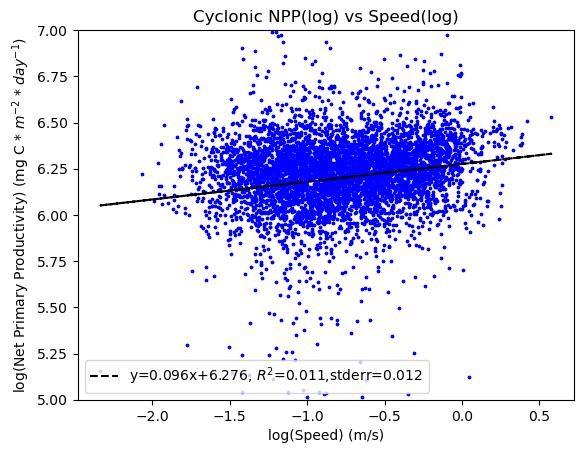

LinregressResult(slope=-0.046009725989641065, intercept=6.054436759893475, rvalue=-0.06810444478328252, pvalue=1.0919823131446362e-06, stderr=0.009427829741948777, intercept_stderr=0.008726801179977305)
R-squared: 0.004638


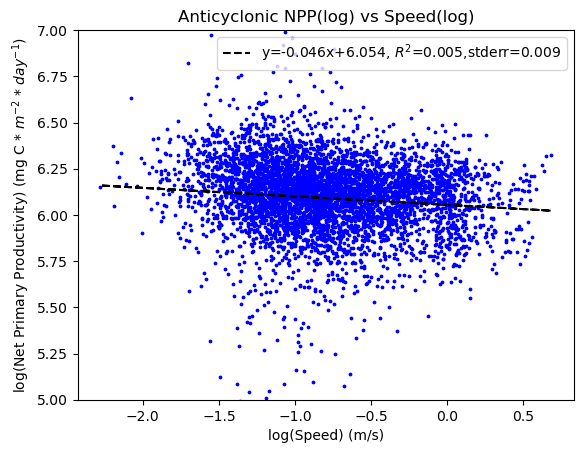

In [22]:
'''
linearplot(speed,chl,'Cyclonic Chl vs Speed', 'Speed (m/s)','Chl (mg * $m^{-3}$)',True,None,(0,3),True)
linearplot(eff_area,chl,'Cyclonic Chl vs Effective Area', 'Effective Area','Chl (mg * $m^{-3}$)',True,None,(0,3),True)
linearplot(amp,chl,'Cyclonic Chl vs Amplitude', 'Amplitude (m)','Chl (mg * $m^{-3}$)',True,None,(0,3),True)
linearplot(eff_radius,chl,'Cyclonic Chl vs Effective Radius', 'Effective Radius','Chl (mg * $m^{-3}$)',True,None,(0,3),True)

#linearplot(speed_anti,chl_anti,'Anticyclonic Chl vs Speed', 'Speed (m/s)','Chl (mg * $m^{-3}$)',True,None,(0,3),True)
#linearplot(eff_area_anti,chl_anti,'Anticyclonic Chl vs Effective Area', 'Effective Area','Chl (mg * $m^{-3}$)',True,None,(0,3),True)
#linearplot(amp_anti,chl_anti,'Anticyclonic Chl vs Amplitude', 'Amplitude (m)','Chl (mg * $m^{-3}$)',True,None,(0,3),True)
#linearplot(eff_radius_anti,chl_anti,'Anticyclonic Chl vs Effective Radius', 'Effective Radius','Chl (mg * $m^{-3}$)',True,None,(0,3),True)
linearplot(speed_anti,amp_anti,'Anticyclonic Amplitude vs Speed', 'Speed (m/s)','Amplitude (m)',False,None,(0,3),True)
'''
#linearplot(speed,chl,'Cyclonic NPP vs Speed', 'Speed (m/s)','Net Primary Productivity (mg C * $m^{-2}$ * $day^{-1}$)',True,None,(0,1600),True)
#linearplot(speed,log_chl,'Cyclonic NPP(log) vs Speed', 'Speed (m/s)','log(Net Primary Productivity) (mg C * $m^{-2}$ * $day^{-1}$)',True,None,(5,7),True)
linearplot(log_speed,log_chl,'Cyclonic NPP(log) vs Speed(log)', 'log(Speed) (m/s)','log(Net Primary Productivity) (mg C * $m^{-2}$ * $day^{-1}$)',True,None,(5,7),True)
#linearplot(eff_area,chl,'Cyclonic NPP vs Effective Area', 'Effective Area','Net Primary Productivity (mg C * $m^{-2}$ * $day^{-1}$)',True,None,(0,1600),True)
#linearplot(amp,chl,'Cyclonic NPP vs Amplitude', 'Amplitude (m)','Net Primary Productivity (mg C * $m^{-2}$ * $day^{-1}$)',True,None,(0,1600),True)
#linearplot(eff_radius,chl,'Cyclonic NPP vs Effective Radius', 'Effective Radius','Net Primary Productivity (mg C * $m^{-2}$ * $day^{-1}$)',True,None,(0,1600),True)

#linearplot(speed_anti,chl_anti,'Anticyclonic NPP vs Speed', 'Speed (m/s)','Net Primary Productivity (mg C * $m^{-2}$ * $day^{-1}$)',True,None,(0,1600),True)
linearplot(log_speed_anti,log_chl_anti,'Anticyclonic NPP(log) vs Speed(log)', 'log(Speed) (m/s)','log(Net Primary Productivity) (mg C * $m^{-2}$ * $day^{-1}$)',True,None,(5,7),True)
#linearplot(speed_anti,log_chl_anti,'Anticyclonic NPP(log) vs Speed', 'Speed (m/s)','log(Net Primary Productivity) (mg C * $m^{-2}$ * $day^{-1}$)',True,None,(5,7),True)
#linearplot(eff_area_anti,chl_anti,'Anticyclonic NPP vs Effective Area', 'Effective Area','Net Primary Productivity (mg C * $m^{-2}$ * $day^{-1}$)',True,None,(0,1600),True)
#linearplot(amp_anti,chl_anti,'Anticyclonic NPP vs Amplitude', 'Amplitude (m)','Net Primary Productivity (mg C * $m^{-2}$ * $day^{-1}$)',True,None,(0,1600),True)
#linearplot(eff_radius_anti,chl_anti,'Anticyclonic NPP vs Effective Radius', 'Effective Radius','Net Primary Productivity (mg C * $m^{-2}$ * $day^{-1}$)',True,None,(0,1600),True)
#linearplot(speed_anti,amp_anti,'Anticyclonic Amplitude vs Speed', 'Speed (m/s)','Amplitude (m)',False,None,(0,3),True)

In [11]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
corr2, _ = pearsonr(speed_anti,amp_anti)
corr, _ = spearmanr(speed_anti,amp_anti)
print('Pearsons correlation: ',corr2)
print('Spearmans correlation: ',corr)

Pearsons correlation:  0.8340141643269019
Spearmans correlation:  0.7488161989415263


In [3]:
#cycl_eddy_mask(cycl,file,variable,inside,outside,title,vmin,vmax,cb_label):
sat_files = sorted(glob.glob('/data/watkinson/Fall2022/Sat_data/1day_regrid/*.nc'))
#sat_files = sat_files[0:5]
#print(len(sat_files))
anti_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/Anticyclonic/Anticyclonic_*.nc'))
anti_files = anti_files[:1454]
#print(len(anti_files))
cycl_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/Cyclonic/Cyclonic_*.nc'))
cycl_files = cycl_files[:1454]

#print(len(cycl_files))


cycl_chlor_mean = list()
anti_chlor_mean = list()

n=0
while n < len(sat_files):
#cycl_eddy_mask(c,sat_data,"chlor_a",False,True,"Chlorophyll Concentration Inside of Eddies",0,.2,"Chlorophyl(mg * $m^{-3}$)'")
######set plotting parameters
    from matplotlib.path import Path
    from numpy import ones
    from py_eddy_tracker.poly import create_vertice
    
    a = EddiesObservations.load_file(anti_files[n])
    ######Cyclonic data

    c = EddiesObservations.load_file(cycl_files[n])
    #print(c)


    ###### Sat data
    sat_data = RegularGridDataset((sat_files[n]),
        "lon",
        "lat")
    
    ######code for creating mask for values inside the eddy contour
    x_name_cycl, y_name_cycl = c.intern(False)# We will use the outter effective contour and not the inner speed contour
    #adt_cycl = sat_data.grid("npp")
    #mask_cycl = ones(adt_cycl.shape, dtype="bool")#creates boolean array to use in masking values for cyclonic eddies
       
    ######takes the vertice points that defines the Cyclonic eddy edge and finds i,j pixels within those vertices
    for eddy in c:
        sat_data = RegularGridDataset((sat_files[n]),"lon","lat")
        adt_cycl = sat_data.grid("npp")
        mask_cycl = ones(adt_cycl.shape, dtype="bool")
        i, j = Path(create_vertice(eddy[x_name_cycl], eddy[y_name_cycl])).pixels_in(sat_data)
        mask_cycl[i, j] = False
        adt_cycl.mask[:] = mask_cycl #apply the mask to the data that you want to investigate
        adt_cycl = np.transpose(adt_cycl)
        adt_cycl = ma.masked_where(adt_cycl==0,adt_cycl)
        mean_cycl = np.nanmean(adt_cycl)
        mean_cycl = np.atleast_1d(np.array(mean_cycl))
        cycl_chlor_mean = np.concatenate([cycl_chlor_mean,mean_cycl])
    
    ######code for creating mask for values outside the eddy contour
    x_name_anti, y_name_anti = a.intern(False)# We will use the outter effective contour and not the inner speed contour
    #adt_anti = sat_data.grid("npp")
    #mask_anti = ones(adt_anti.shape, dtype="bool")#creates boolean array to use in masking values for anticyclonic eddies
    
    ######takes the vertice points that defines the eddy edge and finds i,j pixels outside of those vertices
    for eddy in a:
        sat_data = RegularGridDataset((sat_files[n]),"lon","lat")
        adt_anti = sat_data.grid("npp")
        mask_anti = ones(adt_anti.shape, dtype="bool")
        i, j = Path(create_vertice(eddy[x_name_anti], eddy[y_name_anti])).pixels_in(sat_data)
        mask_anti[i, j] = False
        adt_anti.mask[:] = mask_anti
        adt_anti  = np.transpose(adt_anti)
        adt_anti = ma.masked_where(adt_anti==0,adt_anti)
        mean_anti = np.nanmean(adt_anti)
        mean_anti  = np.atleast_1d(np.array(mean_anti ))
        anti_chlor_mean = np.concatenate([anti_chlor_mean,mean_anti])
    
    n=n+1



We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030101.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030101.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030101.nc
/tmp/ipykernel_315062/2249988887.py:52: RuntimeWarning: Mean of empty slice
  mean_cycl = np.nanmean(adt_cycl)
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030101.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030101.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030101.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030101.nc
We assume pixel position of grid is centered for 

In [62]:
print(np.shape(i))

(2097,)


In [4]:
print(np.shape(cycl_chlor_mean))
print(np.shape(anti_chlor_mean))
series = pd.Series(cycl_chlor_mean)
series2 = pd.Series(anti_chlor_mean)
#cycl_chlor_mean[cycl_chlor_mean > 7] = np.nan
#print("Daily-averaged Mean Chlorophyll inside Anticyclonic Eddy Statistical Summary:\n",series2.describe())
#print("Daily-averaged Mean Chlorophyll inside Cyclonic Eddy Statistical Summary:\n",series.describe())
#print("Daily-averaged Mean Phyto. Carbon Biomass inside Anticyclonic Eddy Statistical Summary:\n",series2.describe())
#print("Daily-averaged Mean Phyto. Carbon Biomass inside Cyclonic Eddy Statistical Summary:\n",series.describe())
print("Daily-averaged Mean NPP inside Anticyclonic Eddy Statistical Summary:\n",series2.describe())
print("Daily-averaged Mean NPP inside Cyclonic Eddy Statistical Summary:\n",series.describe())

(11220,)
(9689,)
Daily-averaged Mean NPP inside Anticyclonic Eddy Statistical Summary:
 count    5113.000000
mean      455.267275
std        93.606570
min         0.482723
25%       402.091598
50%       454.213029
75%       503.219589
max      1720.928821
dtype: float64
Daily-averaged Mean NPP inside Cyclonic Eddy Statistical Summary:
 count    5641.000000
mean      511.557049
std       109.828739
min         0.231146
25%       453.659478
50%       511.287787
75%       563.965473
max      1535.484154
dtype: float64


We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030103.nc


14283
187186
0.35021585
nan
(array([], dtype=int64), array([], dtype=int64))


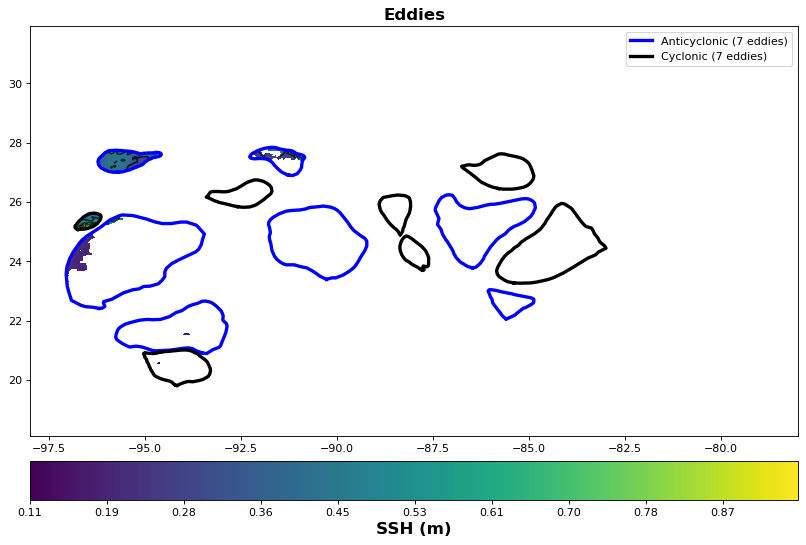

In [17]:
sat_files = sorted(glob.glob('/data/watkinson/Fall2022/Sat_data/1day_regrid/*.nc'))
#sat_files = sat_files[0:8]
anti_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/Anticyclonic/Anticyclonic_*.nc'))

cycl_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/Cyclonic/Cyclonic_*.nc'))

SSH_files = sorted(glob.glob('/data/watkinson/Fall2022/SSH_data/Cropped_SSH_Data/*.nc'))
#sat_data = RegularGridDataset((SSH_files[2]),
    #"lon",
    #"lat")
a = EddiesObservations.load_file(anti_files[2])
######Cyclonic data

c = EddiesObservations.load_file(cycl_files[2])
#print(c)


 ###### Sat data
sat_data = RegularGridDataset((sat_files[2]),
    "lon",
    "lat")

from matplotlib.path import Path
from numpy import ones
from py_eddy_tracker.poly import create_vertice
x_name_anti, y_name_anti = a.intern(False)# We will use the outter effective contour and not the inner speed contour
#print(x_name_anti[0])
adt_anti = sat_data.grid("chlor_a")
#print(adt_anti)
mask_anti = ones(adt_anti.shape, dtype="bool")#creates boolean array to use in masking values for anticyclonic eddies
######takes the vertice points that defines the eddy edge and finds i,j pixels outside of those vertices
for eddy in a:
    i, j = Path(create_vertice(eddy[x_name_anti], eddy[y_name_anti])).pixels_in(sat_data)
    #print(j)
    mask_anti[i, j] = False
adt_anti.mask[:] = mask_anti
print(np.count_nonzero(adt_anti>0))
print(np.size(adt_anti))
#print(len(a))

for eddy in c:
    i, j = Path(create_vertice(eddy[x_name_anti], eddy[y_name_anti])).pixels_in(sat_data)
    mask_anti[i, j] = False
adt_anti.mask[:] = mask_anti 

#adt_anti = adt_anti.mask.astype(int)
#sat_data2 = xr.open_dataset((sat_files[2]))
#chlor_anti  = sat_data2.chlor_a
#print(i,j)
adt_anti  = np.transpose(adt_anti)
#phyto_anti  = chlor_anti  * adt_anti 
#phyto_anti  = phyto_anti.where(phyto_anti  != 0)
#print(phyto)
#mean_anti = np.nanmean(phyto_anti)
#adt_anti  = adt_anti.where(adt_anti  != 0)
adt_anti = ma.masked_where(adt_anti==0,adt_anti)

mean_anti = np.nanmean(adt_anti)
#mean_anti  = np.atleast_1d(np.array(mean_anti ))
#anti_chlor_mean = np.concatenate([anti_chlor_mean,mean_anti])
#print(np.shape(phyto_anti))
#print(np.count_nonzero(adt_anti>1))
print(mean_anti)
#adt_anti  = adt_anti.where(adt_anti  != 0)
#adt_anti[adt_anti<0]== np.nan
fig = plt.figure(figsize=(12, 8), dpi=80)
ax = fig.add_axes([.03,.03,.8,.8])
plt.title('Eddies',loc='center',fontsize=15,fontweight='bold')#,y=1.03)
      
SSH_data = xr.open_dataset(sat_files[0])
#a = EddiesObservations.load_file(directory_out + '/Anticyclonic' + '/Anticyclonic_' + date + '.nc')
#c = EddiesObservations.load_file(directory_out + '/Cyclonic' + '/Cyclonic_' + date + '.nc')
#load in lat, lon and SSh data for plot and print min and max SSH
lat=SSH_data.lat
#lon=SSH_data.lon+360
ax.set_xlim(-98, -78)
lon=SSH_data.lon
#ssh = SSH_data.adt
#print(np.min(ssh))
print(np.max(adt_anti))
print(np.where(adt_anti==97.65259))
#Make lon and lat a 2d mesh grid for plotting purposes
lon2d,lat2d=np.meshgrid(lon,lat)
cf = ax.contourf(lon2d,lat2d,adt_anti,cmap='viridis',levels=np.linspace(np.nanmin(adt_anti),np.nanmax(adt_anti),400))
cl = ax.contour(lon2d,lat2d,adt_anti,colors='k',alpha=.7)#,levels=np.arange(np.min(adt_anti),np.max(adt_anti),.1))
#Use to add legend with the number of anticyclonic and cyclonic eddies that day
a.display(ax, extern_only=True, label='Anticyclonic ({nb_obs} eddies)',color='blue',lw=3,ls='solid') 
c.display(ax, extern_only=True, label="Cyclonic ({nb_obs} eddies)", color="k", lw=3,ls='solid')
plt.clabel(cl, inline=1, fontsize=10)
cbar = fig.colorbar(cf,location='bottom',format='%.2f',pad=.05)#shrink=.6,pad=.04)
cbar.ax.set_xlabel('SSH (m)',fontsize=15,fontweight='bold')
_= ax.legend(loc="best")


In [14]:
dir = '/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/'
#dir = '/data/watkinson/Fall2022/Eddy_data/Original_eddies/'
import pandas as pd
cycl_eddies = pd.read_pickle(dir + "Cyclonic_tuned_eddies_2003_to_2005.pkl")
#cycl_eddies = pd.read_pickle(dir + "Cyclonic_OG_eddies_2003_to_2006.pkl")
cycl_eddies = cycl_eddies.iloc[6::50,:]
#print(cycl_eddies)
cycl_eddies = cycl_eddies.iloc[:,[1,22]]
cycl_eddies = cycl_eddies.reset_index(drop=True)#drop previous method of indexing and reset
cycl_eddies['time']=pd.to_datetime(cycl_eddies['time'])#convert entire "Dates" Column to datetime format this time 
cycl_eddies.index=cycl_eddies['time']
#cycl_eddies = cycl_eddies.amplitude.resample('D').mean()
cycl_eddies = cycl_eddies.effective_area.resample('D').mean()
#print(cycl_eddies)

#print(np.max(cycl_eddies))
anti_eddies = pd.read_pickle(dir + "Anticyclonic_tuned_eddies_2003_to_2005.pkl")

anti_eddies = anti_eddies.iloc[6::50,:]
anti_eddies = anti_eddies.iloc[:,[1,22]]
anti_eddies = anti_eddies.reset_index(drop=True)#drop previous method of indexing and reset
anti_eddies['time']=pd.to_datetime(anti_eddies['time'])#convert entire "Dates" Column to datetime format this time 
anti_eddies.index=anti_eddies['time']
#anti_eddies = anti_eddies.amplitude.resample('D').mean()
anti_eddies = anti_eddies.effective_area.resample('D').mean()
print(anti_eddies)


time
2003-01-01    3.442681e+10
2003-01-02    2.720897e+10
2003-01-03    3.287760e+10
2003-01-04    2.191984e+10
2003-01-05    2.522139e+10
                  ...     
2005-12-25    2.519798e+10
2005-12-26    3.233305e+10
2005-12-27    2.569414e+10
2005-12-28    2.922081e+10
2005-12-29    2.138708e+10
Freq: D, Name: effective_area, Length: 1094, dtype: float32


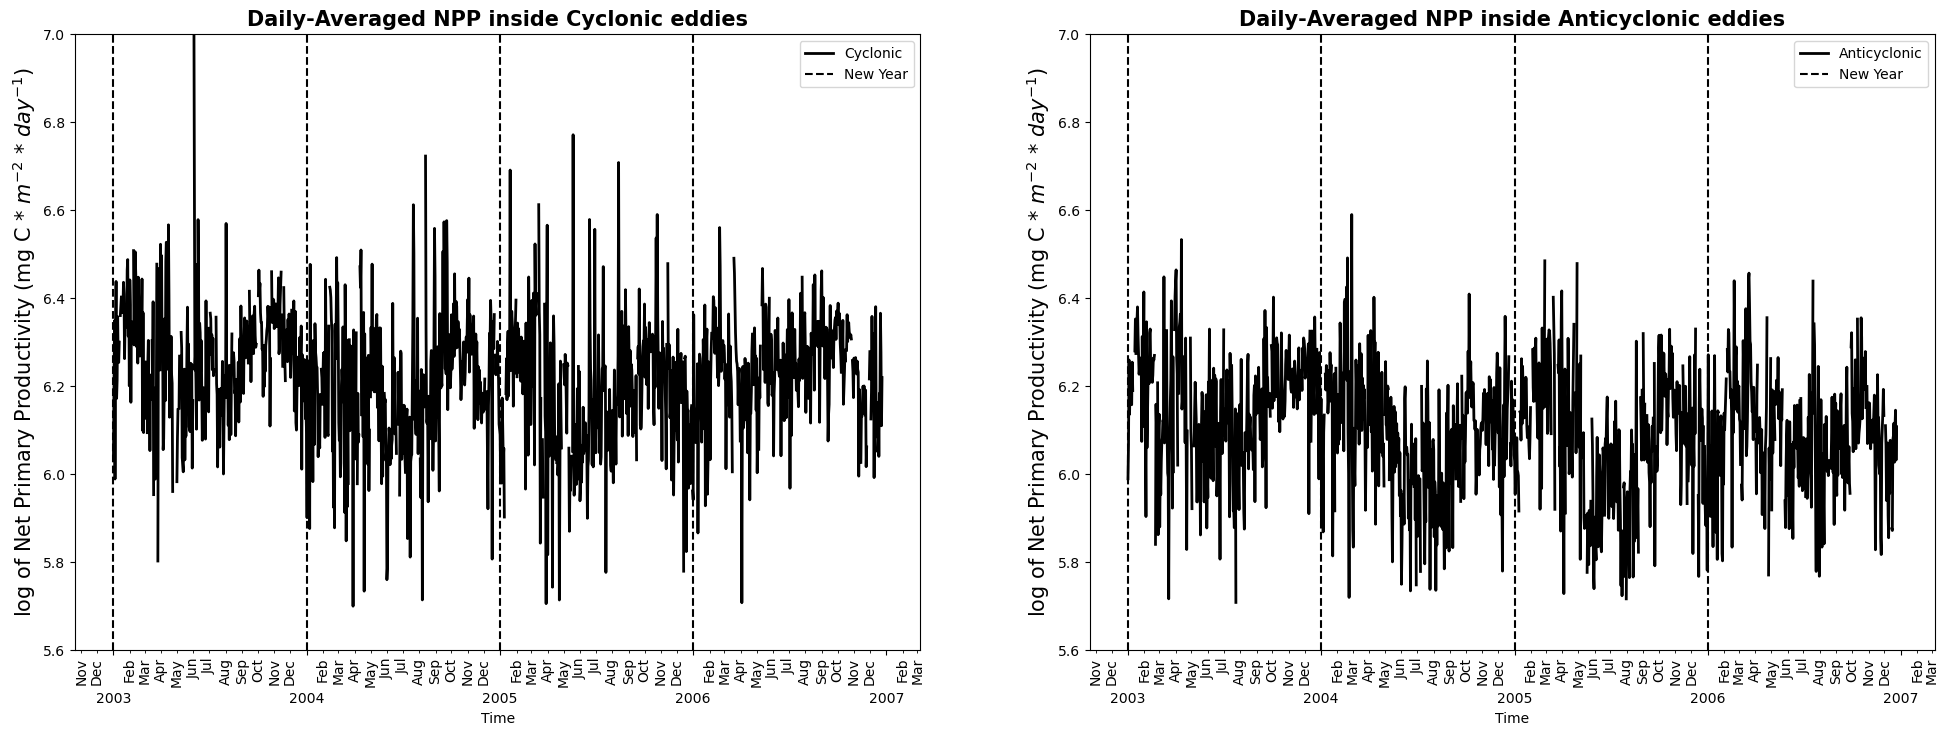

In [13]:
start = dt.datetime(2003,1,1)
new_dates = [start + dt.timedelta(days=i) for i in range(1454)]
#new_dates = [start + dt.timedelta(days=i) for i in range(1094)]
#new_dates_y = [start + dt.timedelta(days=i) for i in range(360)]
#y=new_dates_y
#print(new_dates)

x = new_dates
#x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
import matplotlib.dates as mdates
xfmt_major=mdates.DateFormatter('\n\n%Y')
xfmt_minor=mdates.DateFormatter('%b')
#xfmt_major=mdates.DateFormatter('%b')
#xfmt_minor=mdates.DateFormatter('%d')
months=mdates.MonthLocator()
years=mdates.YearLocator()
#days=mdates.DayLocator(interval=15)
#fig = plt.figure(figsize=(12, 8), dpi=80)
#ax = fig.add_axes([.03,.03,.8,.8])
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(24,8))
#ax1.set_title('Daily-Averaged Mean Chlorophyll within GoM-tuned \nCyclonic eddies (eff contour) from satellite',loc='center',fontsize=15,fontweight='bold')
#ax2.set_title('Daily-Averaged Mean Chlorophyll within GoM-tuned \nAnticyclonic eddies (eff contour) from satellite',loc='center',fontsize=15,fontweight='bold')
#ax1.set_title('Daily-Averaged Mean Phytoplankton Carbon Biomass \nCyclonic eddies (eff contour) from satellite',loc='center',fontsize=15,fontweight='bold')
#ax2.set_title('Daily-Averaged Mean Phytoplankton Carbon Biomass \nAnticyclonic eddies (eff contour) from satellite',loc='center',fontsize=15,fontweight='bold')
#ax1.set_title('Daily-Averaged Mean Net Primary Productivity within \nCyclonic eddies (eff contour) from satellite',loc='center',fontsize=15,fontweight='bold')
#ax2.set_title('Daily-Averaged Mean Net Primary Productivity within \nAnticyclonic eddies (eff contour) from satellite',loc='center',fontsize=15,fontweight='bold')
ax1.set_title('Daily-Averaged NPP inside Cyclonic eddies',loc='center',fontsize=15,fontweight='bold')
ax2.set_title('Daily-Averaged NPP inside Anticyclonic eddies',loc='center',fontsize=15,fontweight='bold')

#ax1.set_ylim(-3,1)
#ax2.set_ylim(100,700)
#cycl_chlor_mean = np.log(cycl_chlor_mean)
#anti_chlor_mean =  np.log(anti_chlor_mean)
#cycl_chlor_mean[cycl_chlor_mean < 5.7] = np.nan
#anti_chlor_mean[anti_chlor_mean < 5.7] = np.nan
#ax1.plot(x,np.log(cycl_chlor_mean),label='Cyclonic',color='k',lw=2)#,alpha=.5)
ax1.plot(x,cycl_chlor_mean,label='Cyclonic',color='k',lw=2)#,alpha=.5)
#ax2.plot(x,np.log(anti_chlor_mean),label='Anticyclonic',color='k',lw=2)#,alpha=.5)
ax2.plot(x,anti_chlor_mean,label='Anticyclonic',color='k',lw=2)#,alpha=.5)

'''
ax3 = ax1.twinx()
ax4 = ax2.twinx()
ax3.plot(x,np.log(cycl_eddies), label='Amplitude',color='red',lw=2)#,alpha=.5)
#ax3.plot(x,anti_eddies.amplitude, label='Amplitude',color='green',lw=2,alpha=.5)
#ax4.plot(x,cycl_eddies.amplitude, label='Amplitude',color='blue',lw=2,alpha=.5)
ax4.plot(x,np.log(anti_eddies), label='Amplitude',color='red',lw=2)#,alpha=.5)
'''
#ax1.vlines(x=['2003-01-01','2004-01-01','2005-01-01','2006-01-01'],
          #ymin=np.nanmin(np.log(cycl_chlor_mean)), ymax=np.nanmax(np.log(cycl_chlor_mean)),colors='k',ls='--',label='New Year')
#ax1.vlines(x=['2003-01-01','2004-01-01','2005-01-01','2006-01-01'],
          #ymin=np.nanmin(cycl_chlor_mean), ymax=np.nanmax(cycl_chlor_mean),colors='k',ls='--',label='New Year')
ax1.vlines(x=['2003-01-01','2004-01-01','2005-01-01','2006-01-01'],
          ymin=5.6, ymax=7,colors='k',ls='--',label='New Year')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(xfmt_major)
#ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_minor_formatter(xfmt_minor)
plt.setp(ax1.xaxis.get_minorticklabels(), rotation=90)
ax1.set_xlabel('Time')
#ax1.set_ylabel('Chl (mg * $m^{-3}$)',fontsize=15)
#ax1.set_ylabel('log of Chl (mg * $m^{-3}$)',fontsize=15)
#ax1.set_ylabel('Phyto. Cabon Biomass (mg C * $m^{-3}$)',fontsize=15)
#ax1.set_ylabel('log of Phyto. Cabon Biomass (mg C * $m^{-3}$)',fontsize=15)
#ax1.set_ylabel('Net Primary Productivity (mg C * $m^{-2}$ * $day^{-1}$)',fontsize=15)
ax1.set_ylabel('log of Net Primary Productivity (mg C * $m^{-2}$ * $day^{-1}$)',fontsize=15)
ax1.legend(loc='best')

#ax2.vlines(x=['2003-01-01','2004-01-01','2005-01-01','2006-01-01'],
          #ymin=np.nanmin(np.log(anti_chlor_mean)), ymax=np.nanmax(np.log(anti_chlor_mean)),colors='k',ls='--',label='New Year')
#ax2.vlines(x=['2003-01-01','2004-01-01','2005-01-01','2006-01-01'],
          #ymin=np.nanmin(anti_chlor_mean), ymax=np.nanmax(anti_chlor_mean),colors='k',ls='--',label='New Year')
ax2.vlines(x=['2003-01-01','2004-01-01','2005-01-01','2006-01-01'],
          ymin=5.6, ymax=7,colors='k',ls='--',label='New Year')
ax2.xaxis.set_major_locator(years)
ax2.xaxis.set_major_formatter(xfmt_major)
#ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax2.xaxis.set_minor_locator(months)
ax2.xaxis.set_minor_formatter(xfmt_minor)
plt.setp(ax2.xaxis.get_minorticklabels(), rotation=90)
ax2.set_xlabel('Time')
#ax2.set_ylabel('Chl (mg * $m^{-3}$)',fontsize=15)
#ax2.set_ylabel('log of Chl (mg * $m^{-3}$)',fontsize=15)
#ax2.set_ylabel('Phyto. Cabon Biomass (mg C * $m^{-3}$)',fontsize=15)
#ax2.set_ylabel('log of Phyto. Cabon Biomass (mg C * $m^{-3}$)',fontsize=15)
#ax2.set_ylabel('Net Primary Productivity (mg C * $m^{-2}$ * $day^{-1}$)',fontsize=15)
ax2.set_ylabel('log of Net Primary Productivity (mg C * $m^{-2}$ * $day^{-1}$)',fontsize=15)
ax2.legend(loc='best')
ax1.set_ylim(5.6,7)
ax2.set_ylim(5.6,7)
#ax3.set_ylabel('Amplitude (meters)',fontsize=15)
#ax4.set_ylabel('Amplitude (meters)',fontsize=15)
plt.show()

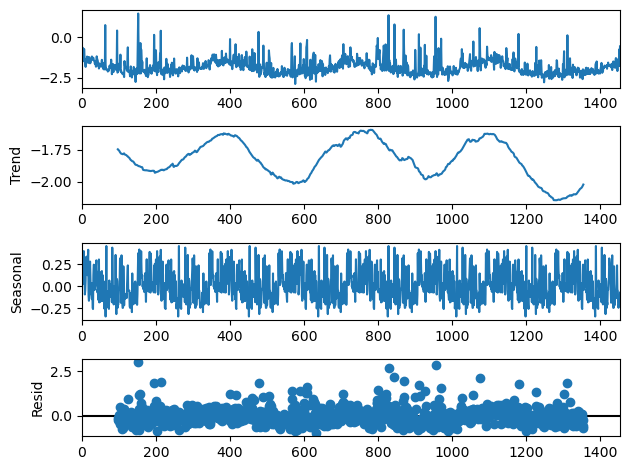

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

#cycl_chlor_mean = pd.Series(np.log(cycl_chlor_mean))
#cycl_chlor_mean = cycl_chlor_mean.dropna()

decompose_result_add = seasonal_decompose(cycl_chlor_mean, model="additive",period=180)

trend = decompose_result_add.trend
seasonal = decompose_result_add.seasonal
residual = decompose_result_add.resid

decompose_result_add.plot();

In [64]:
#cycl_eddy_mask(cycl,file,variable,inside,outside,title,vmin,vmax,cb_label):
sat_files = sorted(glob.glob('/data/watkinson/Fall2022/Sat_data/1day_regrid/*.nc'))
#sat_files = sat_files[0:5]
#print(len(sat_files))
anti_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/Anticyclonic/Anticyclonic_*.nc'))
anti_files = anti_files[:1454]
#print(len(anti_files))
cycl_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/Cyclonic/Cyclonic_*.nc'))
cycl_files = cycl_files[:1454]

#print(len(cycl_files))


cycl_chlor_mean = list()
anti_chlor_mean = list()


from matplotlib.path import Path
from numpy import ones
from py_eddy_tracker.poly import create_vertice
    
a = EddiesObservations.load_file(anti_files[2])
######Cyclonic data

c = EddiesObservations.load_file(cycl_files[2])
#print(c)


###### Sat data
sat_data = RegularGridDataset((sat_files[2]),
        "lon",
        "lat")

######code for creating mask for values inside the eddy contour
x_name_cycl, y_name_cycl = c.intern(False)# We will use the outter effective contour and not the inner speed contour
adt_cycl = sat_data.grid("chlor_a")
mask_cycl = ones(adt_cycl.shape, dtype="bool")#creates boolean array to use in masking values for cyclonic eddies
       
######takes the vertice points that defines the Cyclonic eddy edge and finds i,j pixels within those vertices
for eddy in c:
    sat_data = RegularGridDataset((sat_files[2]),"lon","lat")
    adt_cycl = sat_data.grid("chlor_a")
    mask_cycl = ones(adt_cycl.shape, dtype="bool")
    i, j = Path(create_vertice(eddy[x_name_cycl], eddy[y_name_cycl])).pixels_in(sat_data)
    print(x_name_cycl)
    print(y_name_cycl)
    mask_cycl[i, j] = False
    adt_cycl.mask[:] = mask_cycl #apply the mask to the data that you want to investigate
    adt_cycl = np.transpose(adt_cycl)
    adt_cycl = ma.masked_where(adt_cycl==0,adt_cycl)
    mean_cycl = np.nanmean(adt_cycl)
    mean_cycl = np.atleast_1d(np.array(mean_cycl))
    cycl_chlor_mean = np.concatenate([cycl_chlor_mean,mean_cycl])
    
'''       
adt_cycl = np.transpose(adt_cycl)
adt_cycl = ma.masked_where(adt_cycl==0,adt_cycl)
mean_cycl = np.nanmean(adt_cycl)
mean_cycl = np.atleast_1d(np.array(mean_cycl))
cycl_chlor_mean = np.concatenate([cycl_chlor_mean,mean_cycl])
   
    ######code for creating mask for values outside the eddy contour
x_name_anti, y_name_anti = a.intern(False)# We will use the outter effective contour and not the inner speed contour
adt_anti = sat_data.grid("npp")
mask_anti = ones(adt_anti.shape, dtype="bool")#creates boolean array to use in masking values for anticyclonic eddies
    
######takes the vertice points that defines the eddy edge and finds i,j pixels outside of those vertices
for eddy in a:
    i, j = Path(create_vertice(eddy[x_name_anti], eddy[y_name_anti])).pixels_in(sat_data)
    mask_anti[i, j] = False
adt_anti.mask[:] = mask_anti
    
adt_anti  = np.transpose(adt_anti)
adt_anti = ma.masked_where(adt_anti==0,adt_anti)
mean_anti = np.nanmean(adt_anti)
mean_anti  = np.atleast_1d(np.array(mean_anti ))
anti_chlor_mean = np.concatenate([anti_chlor_mean,mean_anti])
'''



We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030103.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030103.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030103.nc
/tmp/ipykernel_103355/129274882.py:51: RuntimeWarning: Mean of empty slice
  mean_cycl = np.nanmean(adt_cycl)
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030103.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030103.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030103.nc
We assume pixel position of grid is centered for /data/watkinson/Fall2022/Sat_data/1day_regrid/CAFE_GOM_day_20030103.nc
We assume pixel position of grid is centered for /

contour_lon_e
contour_lat_e
contour_lon_e
contour_lat_e
contour_lon_e
contour_lat_e
contour_lon_e
contour_lat_e
contour_lon_e
contour_lat_e
contour_lon_e
contour_lat_e
contour_lon_e
contour_lat_e


'       \nadt_cycl = np.transpose(adt_cycl)\nadt_cycl = ma.masked_where(adt_cycl==0,adt_cycl)\nmean_cycl = np.nanmean(adt_cycl)\nmean_cycl = np.atleast_1d(np.array(mean_cycl))\ncycl_chlor_mean = np.concatenate([cycl_chlor_mean,mean_cycl])\n   \n    ######code for creating mask for values outside the eddy contour\nx_name_anti, y_name_anti = a.intern(False)# We will use the outter effective contour and not the inner speed contour\nadt_anti = sat_data.grid("npp")\nmask_anti = ones(adt_anti.shape, dtype="bool")#creates boolean array to use in masking values for anticyclonic eddies\n    \n######takes the vertice points that defines the eddy edge and finds i,j pixels outside of those vertices\nfor eddy in a:\n    i, j = Path(create_vertice(eddy[x_name_anti], eddy[y_name_anti])).pixels_in(sat_data)\n    mask_anti[i, j] = False\nadt_anti.mask[:] = mask_anti\n    \nadt_anti  = np.transpose(adt_anti)\nadt_anti = ma.masked_where(adt_anti==0,adt_anti)\nmean_anti = np.nanmean(adt_anti)\nmean_anti  

In [66]:
print(cycl_chlor_mean)

[0.1119852         nan        nan        nan 0.53844655        nan
 0.23301385]
